Contour plots allow us to project a third dimension of data down onto an X, Y axis, be it a functional relationship between two dimensions of data or some decision threshold of a given model.

But before we can start plotting this third dimension of data, we have to figure out how to *calculate it*.

## Meshgrid

Say we've got two simple vectors, `x` and `y`.

In [1]:
%pylab inline

x = np.linspace(0, 10, 5)
y = np.linspace(0, 1, 4)

Populating the interactive namespace from numpy and matplotlib


`x` has length `5` and `y` has length `4`

In [2]:
print(x)
print(x.shape)
print(y)
print(y.shape)

[  0.    2.5   5.    7.5  10. ]
(5,)
[ 0.          0.33333333  0.66666667  1.        ]
(4,)


**We want to calculate a value for a third vector** `z` ** at every point these two meet**, therefore, *we need to express `z` with dimensions (len(x), len(y))*.

This is where `meshgrid()` comes in.

In [3]:
xx, yy = np.meshgrid(x, y)

It produces a matrix `xx` where our original vector `x` is broadcast as each *row*, with the same number of rows as `y` has length.

In [4]:
print(xx)
print(xx.shape)

[[  0.    2.5   5.    7.5  10. ]
 [  0.    2.5   5.    7.5  10. ]
 [  0.    2.5   5.    7.5  10. ]
 [  0.    2.5   5.    7.5  10. ]]
(4, 5)


Similarly, `yy` has each *column* as `y` vectors, with as many columns as there are `x` values.

In [5]:
print(yy)
print(yy.shape)

[[ 0.          0.          0.          0.          0.        ]
 [ 0.33333333  0.33333333  0.33333333  0.33333333  0.33333333]
 [ 0.66666667  0.66666667  0.66666667  0.66666667  0.66666667]
 [ 1.          1.          1.          1.          1.        ]]
(4, 5)


Now because we have two matricies of the same dimensions, we can do element-wise calculations and preserve our dimensions.

In [6]:
z = xx + yy
z.shape

(4, 5)

In [7]:
z = xx ** yy
z.shape

(4, 5)

In [8]:
z = xx > yy
z.shape

(4, 5)

## Contour

Now that we know how to get clean values for Z, generating a contour plot is a simple call to `plt.contour()`

In [9]:
X = np.linspace(0, 1, 1000)
Y = np.linspace(0, 1, 1000)

xx, yy = np.meshgrid(X, Y)

Z = xx ** 2 - yy 

Ez pz

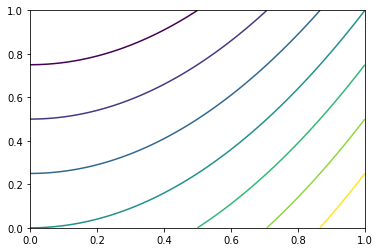

In [10]:
plt.contour(X, Y, Z)

### Labelling Lines

Labelling the contours is also pretty simple. You may have noticed that the call to `contour()` returned a `matplotlib.contour.QuadContourSet` object. If we catch this, we can pass it as an argument to `ax.clabel()`

(0, 1.2)

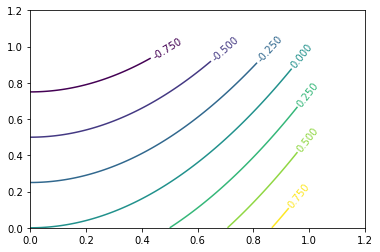

In [11]:
fig, ax = plt.subplots()
cs = ax.contour(X, Y, Z)
ax.clabel(cs)

# adjusting axis because my X, Y were
# pooly-chosen, lol
ax.set_xlim(0, 1.2)
ax.set_ylim(0, 1.2)

### Filled Contour

Filling in the contours is just as simple-- merely tacking an `f` onto the function name!

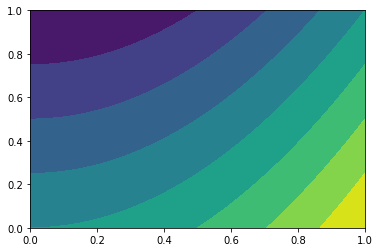

In [12]:
plt.contourf(X, Y, Z)